# Exercise session 7

## Exercise 7.1

Draw $L=300$ samples from independent normal random numbers. 

<AxesSubplot:xlabel='Samples', ylabel='Count'>

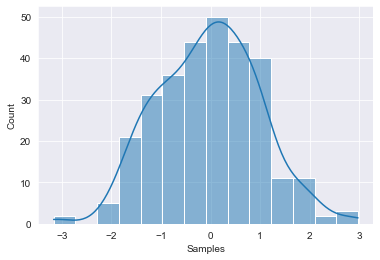

In [83]:
from scipy.stats import norm as Normal
from scipy.stats import bernoulli as Bern
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

L = 300

data = pd.DataFrame(
    {
        'Samples': Normal(loc=0, scale=1).rvs(size=L)
    }
)

sns.histplot(data['Samples'], kde=True)

## Do estimation

In [84]:
print("The estimate of the mean is {}".format(np.mean(data['Samples'])))
print("The estimate of the variance is {}".format(np.var(data['Samples'])))

The estimate of the mean is -0.041149815634262635
The estimate of the variance is 1.039492978429378


## Importance Sampling

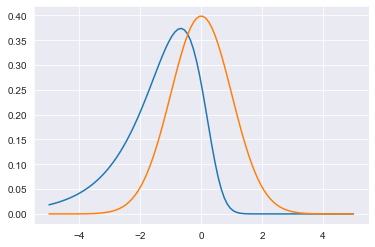

In [85]:
def jsu(x):
    return (
        np.sqrt(2)/np.sqrt(np.pi*(1+(x-1)**2))*np.exp(-0.5*(3+2*np.arcsinh(x-1))**2)
    )

x = np.linspace(-5, 5, 100)

plt.plot(x, jsu(x), label="Target")
plt.plot(x, Normal.pdf(x), label="Proposal")

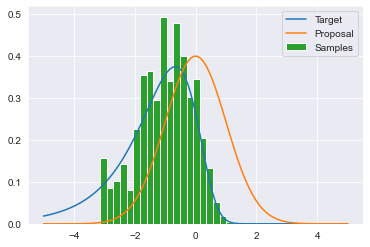

In [86]:
L = 1000

samples = Normal(loc=0, scale=1).rvs(size=L)

data = pd.DataFrame(
    {
        'Samples': samples,
        'Proposal': Normal.pdf(samples),
        'Target': jsu(samples),
        'W': jsu(samples)/Normal.pdf(samples)
    }
)

plt.plot(x, jsu(x), label="Target")
plt.plot(x, Normal.pdf(x), label="Proposal")
plt.hist(data['Samples'], weights=data['W'], density=True, bins=30, label="Samples")
plt.legend()

### More Samples

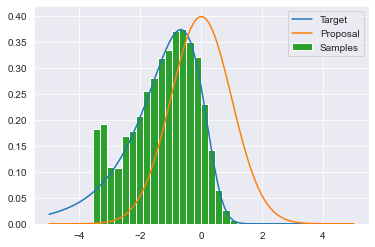

In [87]:
L = 10000

samples = Normal(loc=0, scale=1).rvs(size=L)

data = pd.DataFrame(
    {
        'Samples': samples,
        'Proposal': Normal.pdf(samples),
        'Target': jsu(samples),
        'W': jsu(samples)/Normal.pdf(samples)
    }
)

plt.plot(x, jsu(x), label="Target")
plt.plot(x, Normal.pdf(x), label="Proposal")
plt.hist(data['Samples'], weights=data['W'], density=True, bins=30, label="Samples")
plt.legend()

### Improve proposal

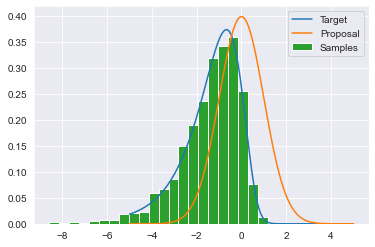

In [88]:
L = 1000

samples = Normal(loc=-2, scale=2).rvs(size=L)

data = pd.DataFrame(
    {
        'Samples': samples,
        'Proposal': Normal(loc=-2, scale=2).pdf(samples),
        'Target': jsu(samples),
        'W': jsu(samples)/Normal(loc=-2, scale=2).pdf(samples)
    }
)

plt.plot(x, jsu(x), label="Target")
plt.plot(x, Normal.pdf(x), label="Proposal")
plt.hist(data['Samples'], weights=data['W'], density=True, bins=30, label="Samples")
plt.legend()

## Exercise 7.4 Gibbs Sampling

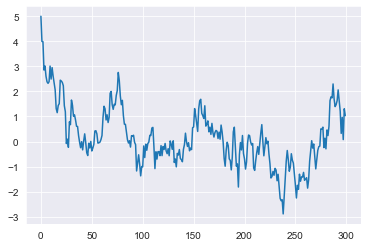

In [89]:
L = 300

x = np.zeros(L)
x[0] = 5

for i in range(1, L):
    x[i] = 0.9*x[i-1] + Normal(0, np.sqrt(0.19)).rvs(size=1)

plt.plot(x)

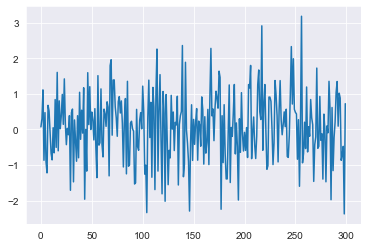

In [90]:
plt.plot(Normal(0, 1).rvs(size=L))

## Gibbs Sampler for directed graph

In [198]:
K = 300

A = np.zeros(K)
B = np.zeros(K)

A[0] = 1
B[0] = 1

for k in range(K-1):
    if B[k] == 0:
        A[k+1] = np.random.binomial(1, 0.03/0.84)
    else:
        A[k+1] = np.random.binomial(1, 0.07/0.16)

    if A[k+1] == 0:
        B[k+1] = np.random.binomial(1, 0.1)
    else:
        B[k+1] = np.random.binomial(1, 0.7)

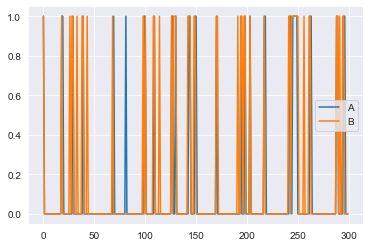

In [200]:
plt.plot(A, label="A")
plt.plot(B, label="B")
plt.legend()

Text(0.5, 1.0, 'P(A)')

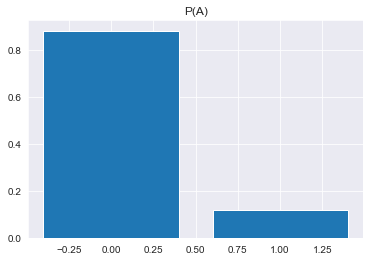

In [209]:
plt.bar(x=(0, 1), height=(sum(1-A)/K, sum(A)/K))
plt.title("P(A)")

Text(0.5, 1.0, 'P(b)')

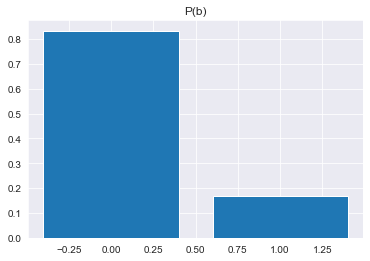

In [210]:
plt.bar(x=(0, 1), height=(sum(1-B)/K, sum(B)/K))
plt.title("P(b)")

## Bayesian Linea